# Машинное обучение, ФКН ВШЭ

## Практическое задание 5

### Общая информация
Дата выдачи: 11.11.2019

Мягкий дедлайн: 1:59MSK 22.11.2019

Жесткий дедлайн: 23:59MSK 23.11.2019

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/15454/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [13]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [14]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

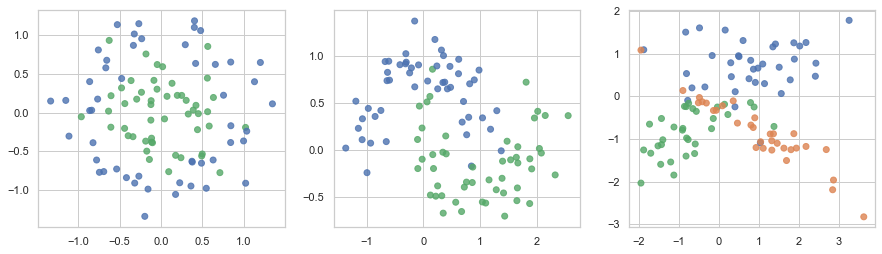

In [15]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [16]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

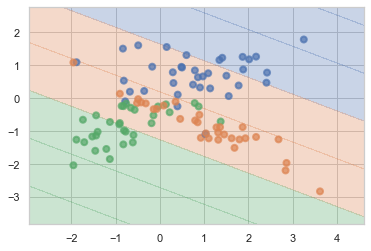

In [17]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Dataset # 0
Train accuracy: 1.0
Test accuracy: 0.85
Dataset # 1
Train accuracy: 1.0
Test accuracy: 0.8
Dataset # 2
Train accuracy: 1.0
Test accuracy: 0.8


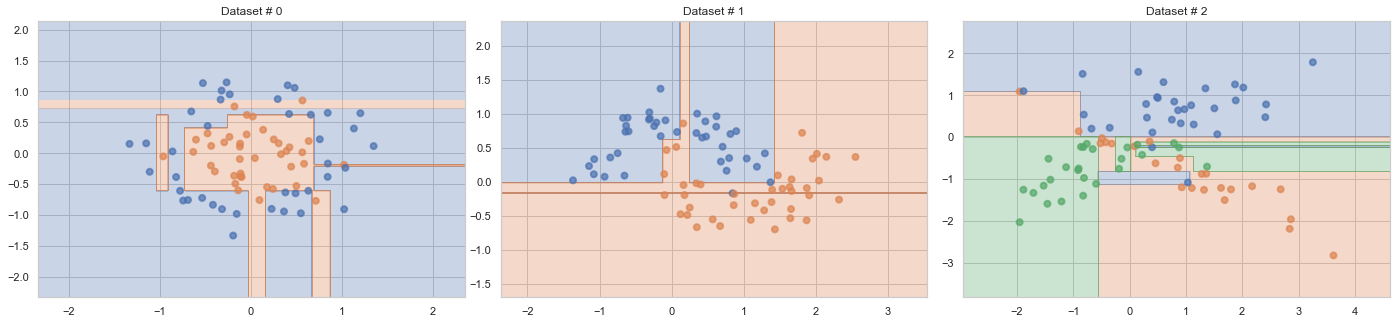

In [25]:
plt.figure(figsize=(20, 5))
for i, (x, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=127)
    clf= DecisionTreeClassifier().fit(X_train, y_train)
    plt.subplot(1, len(datasets), i + 1)
    plot_surface(clf, X_train, y_train)
    plt.title('Dataset # %i' %i)
    print('Dataset #', i)
    print('Train accuracy:', clf.score(X_train, y_train))
    print('Test accuracy:', clf.score(X_test, y_test), end='\n')

__Ответ:__ Видно, что значения `accuracy` на обучающей и тестовой выборке сильно отличаются (на обучающей равно $1.0$, что указывает на подгон под данные), что указывает на переообучение. Если смотреть на графики, видно, что разделяющие плоскости сильно подстроились под данные (все объекты классов распределены правильно, причем области имеют сложную форму -- симптом переобучения).

__2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

<Figure size 3600x2160 with 0 Axes>

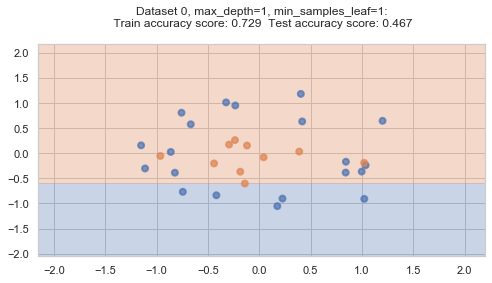

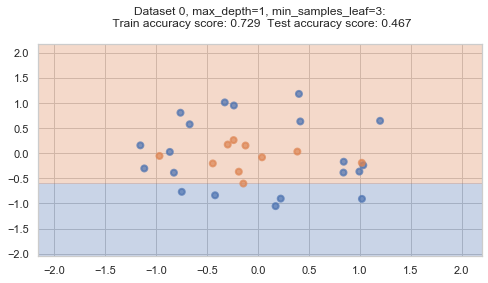

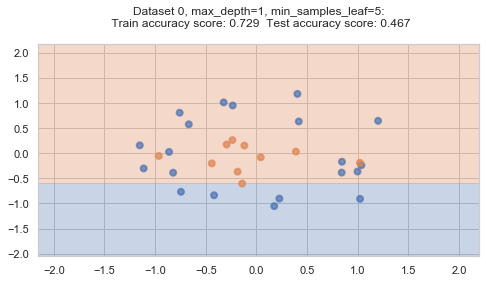

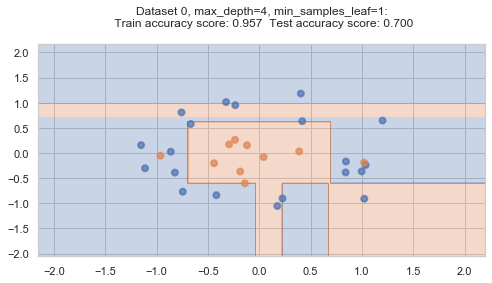

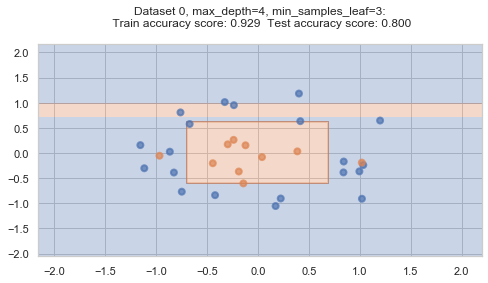

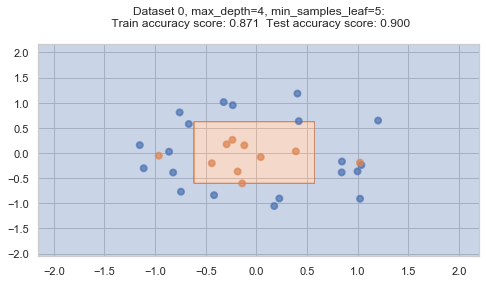

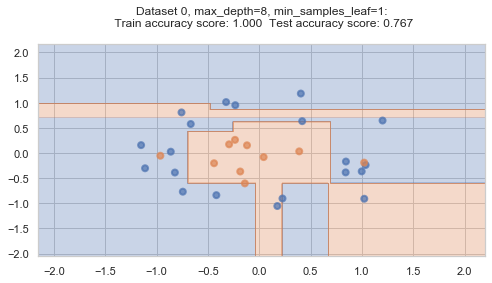

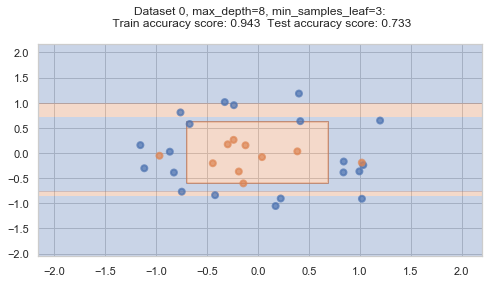

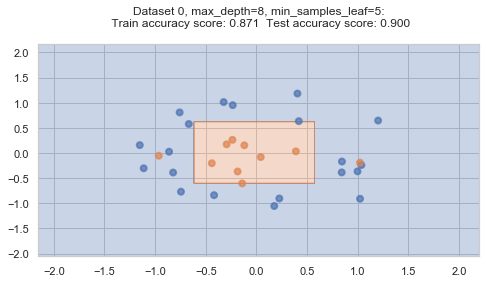

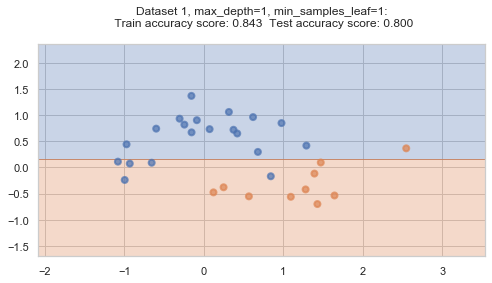

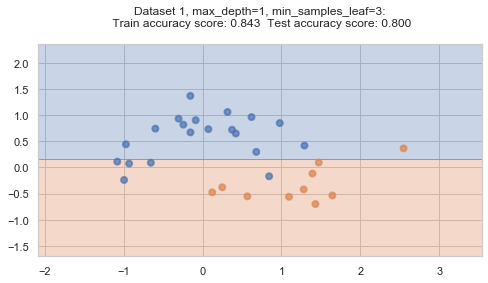

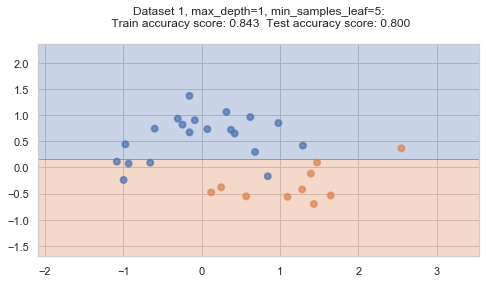

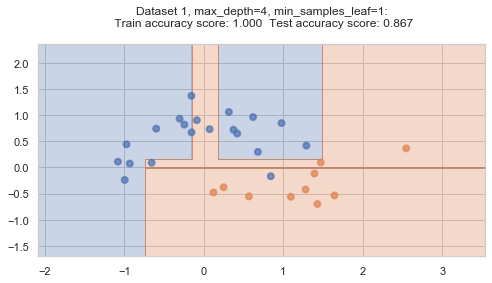

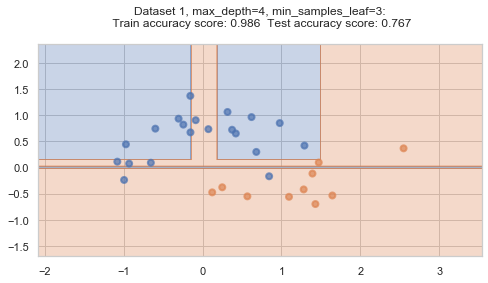

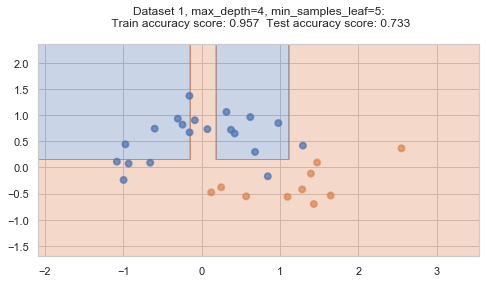

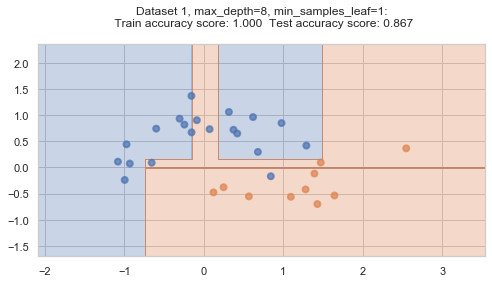

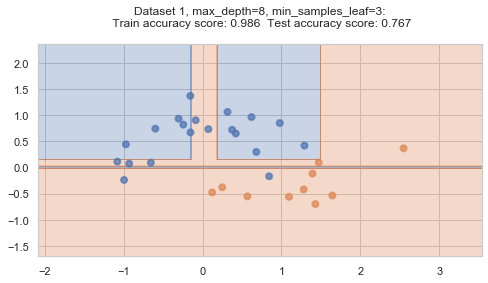

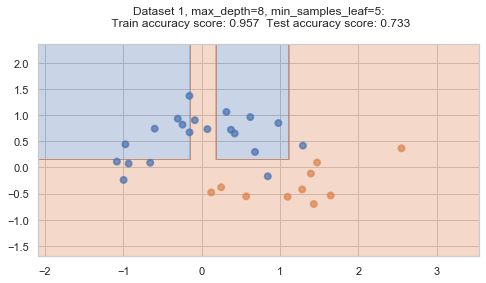

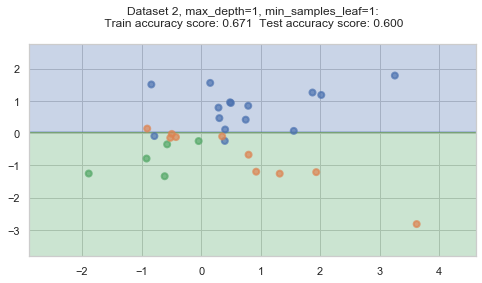

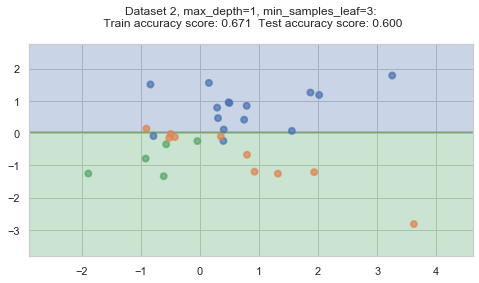

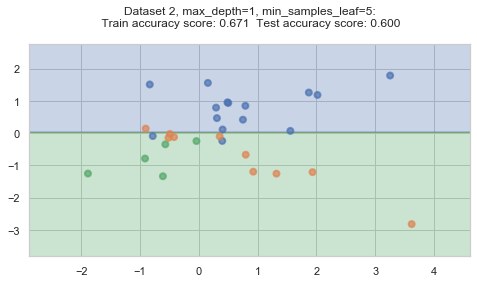

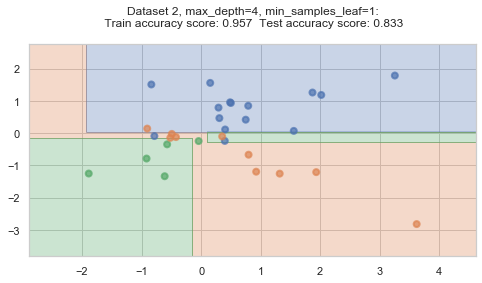

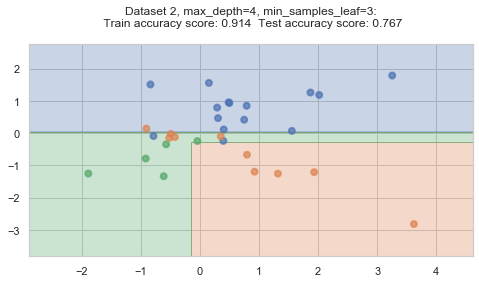

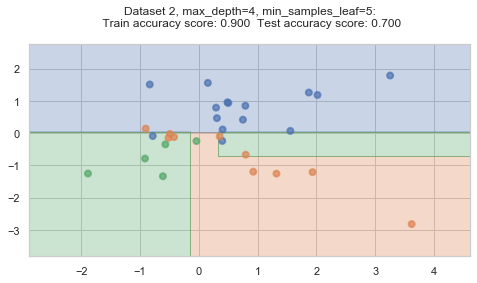

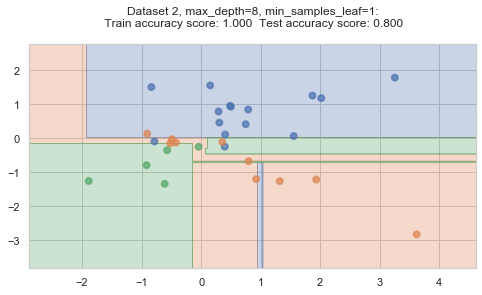

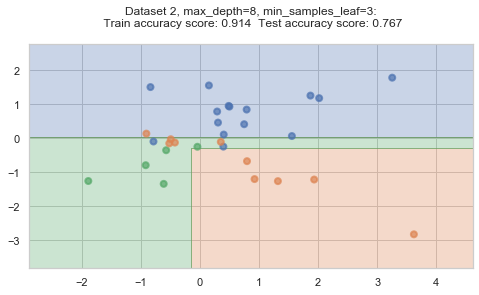

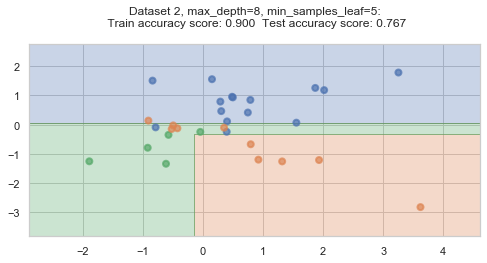

In [325]:
max_depth_params = [1, 4, 8]
min_samples_leaf_params = [1, 3, 5]
# dataset_results = []
idx = 1
plt.figure(figsize=(50,30))
for i, (X, y) in enumerate(datasets):
    for max_depth in max_depth_params:
        for min_samples_leaf in min_samples_leaf_params:
            plt.figure(figsize=(20,30))
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
            clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf).fit(X_train, y_train)
            plt.subplot(len(max_depth_params) * len(min_samples_leaf_params),len(datasets), idx)
            plot_surface(clf, X_test, y_test)
#             dataset_results.append((i, max_depth, min_samples_leaf, clf.score(X_train, y_train), clf.score(X_test, y_test)))
            plt.title('Dataset %d, max_depth=%d, min_samples_leaf=%d:\n Train accuracy score: %.3f  Test accuracy score: %.3f\n' % 
                      (i, max_depth, min_samples_leaf, clf.score(X_train, y_train), clf.score(X_test, y_test)))
            idx += 1
plt.tight_layout()
plt.show()

In [347]:
dataset_res = pd.DataFrame(columns=['dataset','max_depth', 'min_samples_leaf', 'train', 'test'])

In [348]:
max_depth_params = np.arange(1, 35, 2)
min_samples_leaf_params = np.arange(1, 20, 2)

In [349]:
# dataset_results = {0:[], 1:[], 2:[]}
for i, (X, y) in enumerate(datasets):
    for max_depth in max_depth_params:
        for min_samples_leaf in min_samples_leaf_params:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
            clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf).fit(X_train, y_train)
            dataset_res = dataset_res.append({'dataset': i, 'max_depth':max_depth, 'min_samples_leaf': min_samples_leaf, 'train': clf.score(X_train, y_train), 'test': clf.score(X_test, y_test)}, ignore_index=True)

In [350]:
dataset_res = dataset_res.astype({'dataset': 'int64', 'max_depth': 'int64', 'min_samples_leaf': 'int64', 'train': 'float', 'test': 'float'}) 

In [351]:
groups = dataset_res.groupby('dataset')

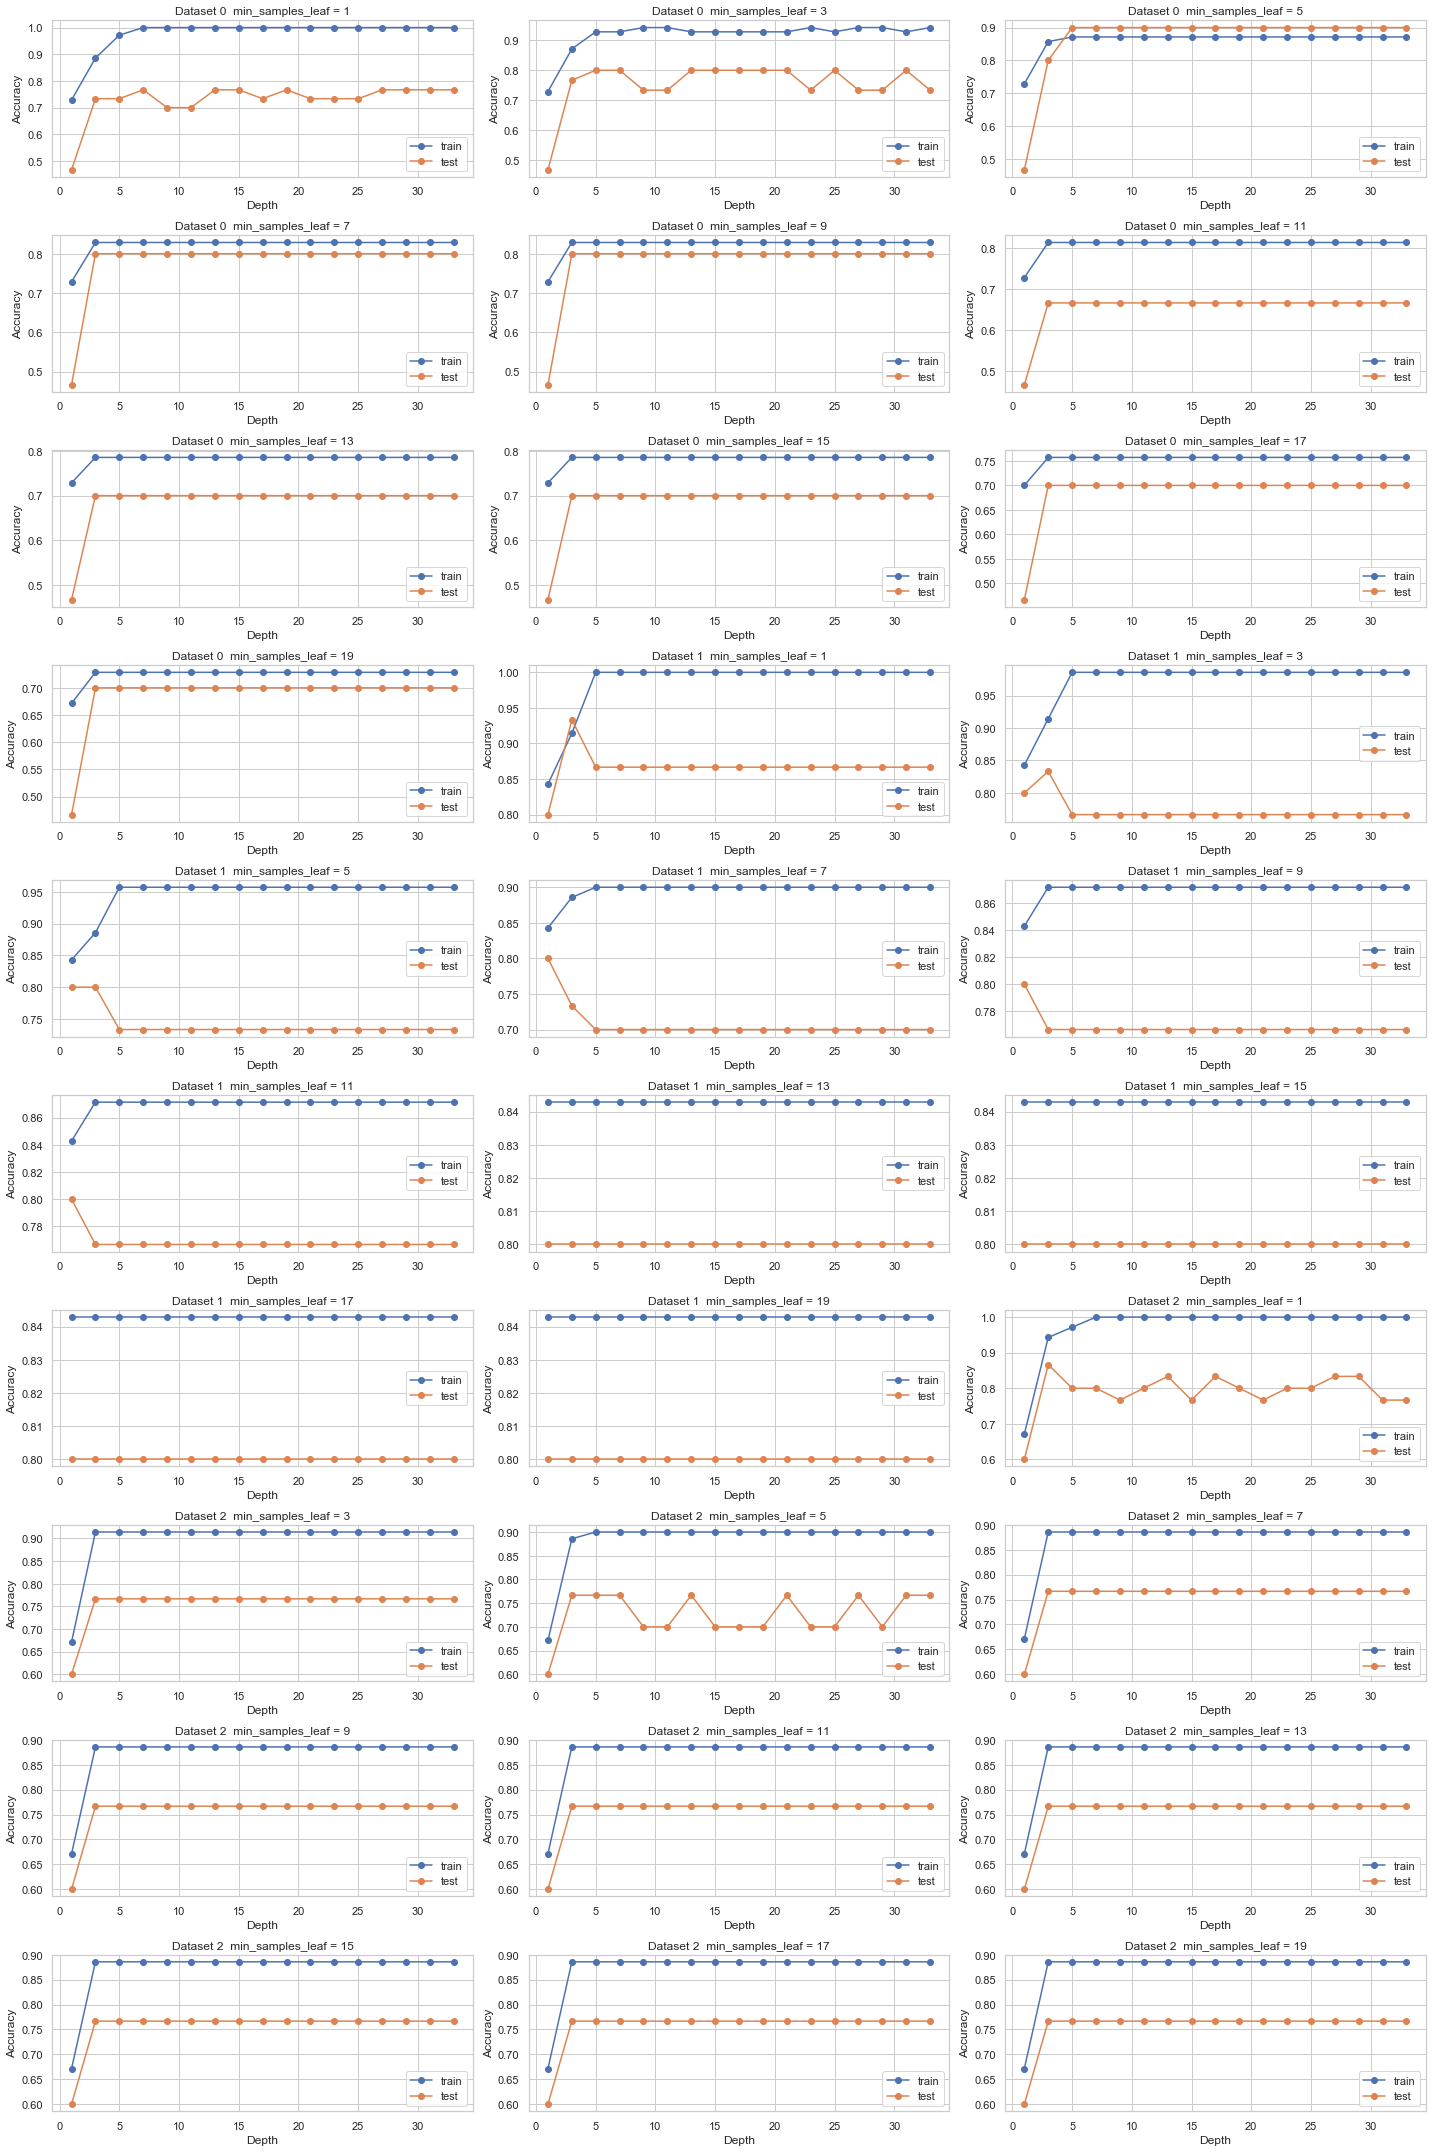

In [352]:
idx = 1
plt.figure(figsize=(20, 30))
for i in range(3):
    dataset_info = groups.get_group(i)
    dst = dataset_info.groupby('min_samples_leaf')
    for min_samples_leaf in min_samples_leaf_params:
        curr = dst.get_group(min_samples_leaf)
        plt.subplot(len(min_samples_leaf_params), 3, idx)
        idx += 1
        plt.plot(curr['max_depth'], curr['train'], marker='o', label='train')
        plt.plot(curr['max_depth'], curr['test'], marker='o', label='test')
        plt.legend()
        plt.xlabel('Depth')
        plt.ylabel('Accuracy')
        plt.title('Dataset %d  min_samples_leaf = %d' % (i,min_samples_leaf))
        
plt.tight_layout() 
plt.show()

__Ответ:__ Увеличение максимально возможного числа объектов в листе и уменьшение максмально возможной глубины дерева приводит к снижению сложности модели и повышению обобщающей способности, дерево меньше подгоняется под данные обучающей выборки.

В `Dataset 0` разделяющие плоскости простые, значит, лучшие результаты достигаются при максимуме параметра `min_samples_leaf` и минимуме `max_depth`. Когда отходим от выбранных параметров, мы сильно подстраиваемся под шум в данных, что очень плохо влияет на модель.

В `Dataset 1` разделяющие плоскости немного сложнее , но закономерность в том, что при большом `min_samples_leaf` мы имеем сходимость в `accuracy` при уже довольно небольшой глубине. В остальном, поведение из предыдущего датасета.

В `Dataset 2` уже очень сложно разделяются объекты, поэтому вариация параметров никак не может здесь помочь, переообучение наступает очень быстро.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

In [78]:
import numpy as np

def find_best_split(feature_vector, target_vector):
    sorted_inds = np.argsort(feature_vector)
    feature_sorted = np.array(feature_vector)[sorted_inds]
    mask = feature_sorted[1:] != feature_sorted[:-1]
    target_sorted = np.array(target_vector)[sorted_inds]
    thresholds = ((feature_sorted[1:] + feature_sorted[:-1]) / 2)[mask]

    sz = len(target_sorted)
    l_sz = np.arange(1, sz)
    l_1 = np.cumsum(target_sorted)
    p_l_1 = l_1[:-1] / l_sz
    p_l_0 = 1 - p_l_1
    h_l = 1 - p_l_0**2 - p_l_1**2
    

    r_sz = sz - l_sz
    r_1 = l_1[-1] - l_1[:-1]
    p_r_1 = r_1 / (sz - l_sz)
    p_r_0 = 1 - p_r_1
    h_r = 1 - p_r_0**2 - p_r_1**2

    ginis = (-(h_l) * l_sz / sz  -(h_r) * r_sz / sz)[mask]

    best = np.argmax(ginis)
    threshold_best = thresholds[best]
    gini_best = ginis[best]

    return thresholds, ginis, threshold_best, gini_best

__4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [197]:
students = pd.read_csv('/Users/armine/Downloads/students.csv')

In [200]:
students.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [203]:
target = students[students.columns[-1]]
features = students.drop(columns = students.columns[-1])

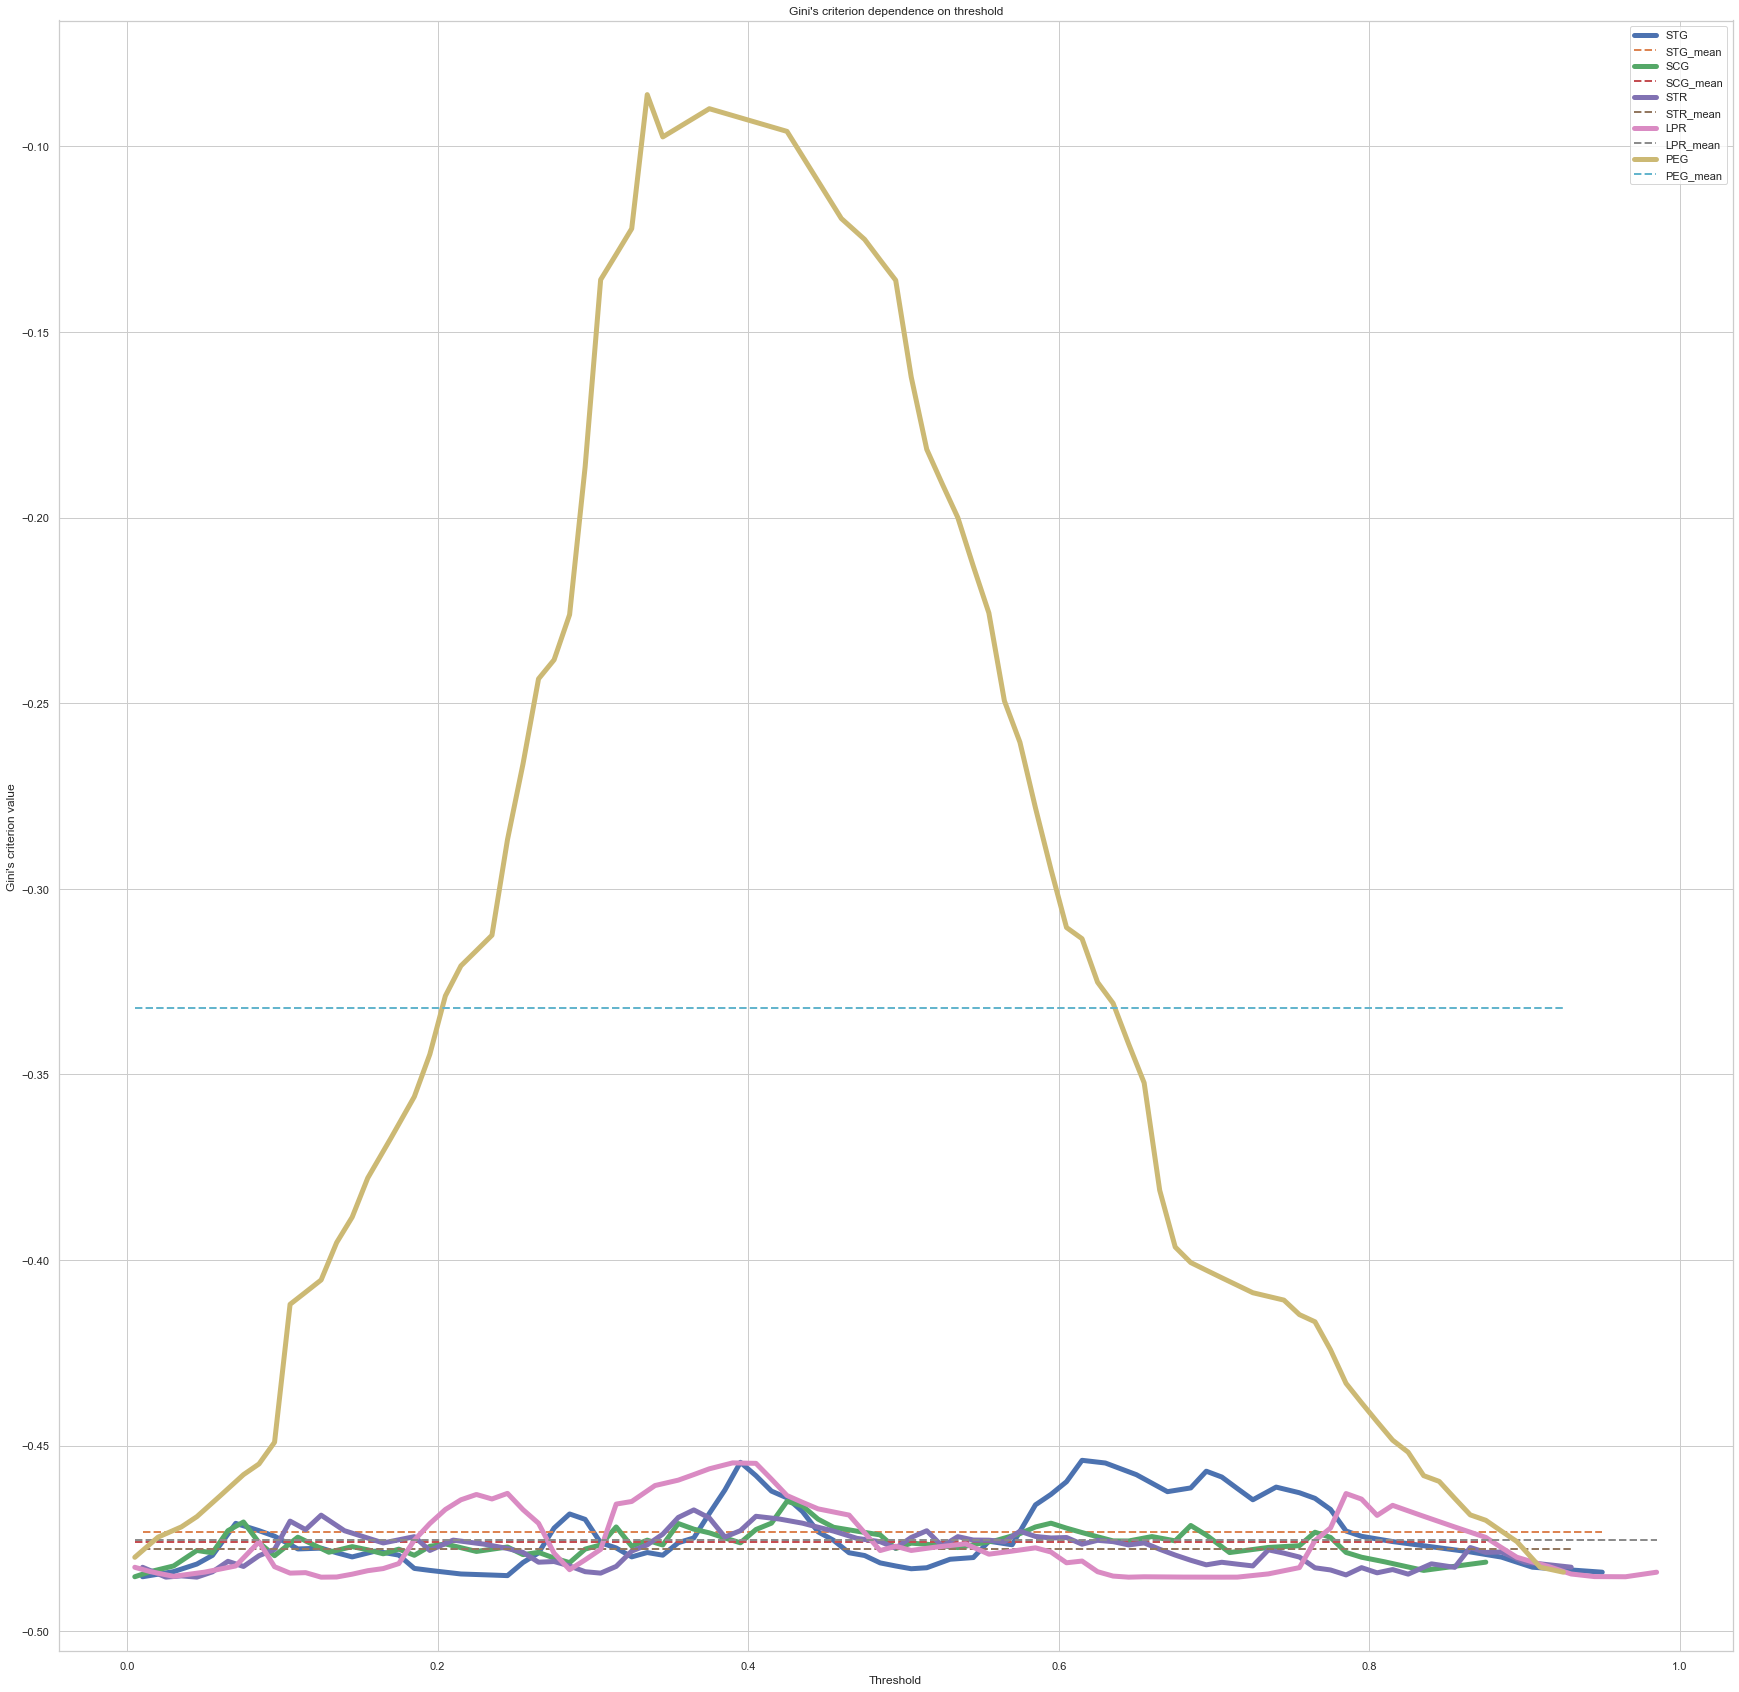

In [365]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 30))
plt.grid(True)
plt.title("Gini's criterion dependence on threshold")
plt.xlabel('Threshold')
plt.ylabel("Gini's criterion value")

for col in features.columns:
    thresholds, ginis, threshold_best, gini_best = find_best_split(features[col].values, target.values)
    plt.plot(thresholds, ginis, label=col, linewidth=5)
    plt.plot(thresholds, [ginis.mean()] * thresholds.shape[0], linestyle='dashed', linewidth=2, label=col+'_mean')

plt.legend()
plt.show()

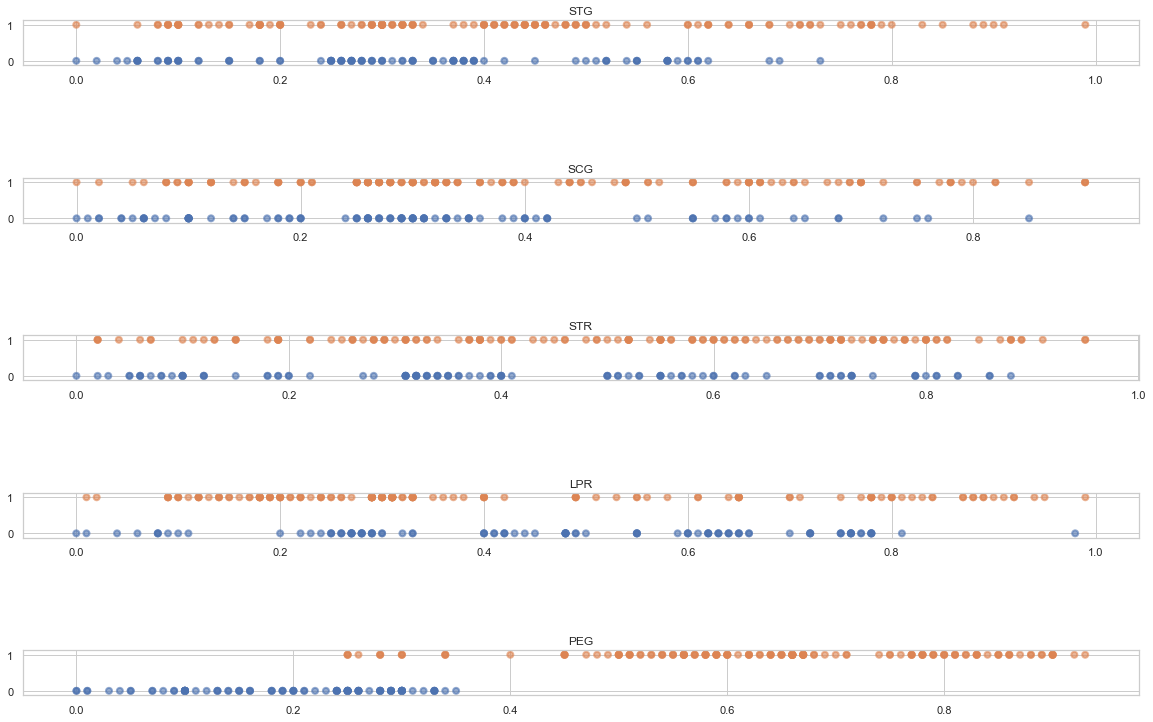

In [447]:
plt.figure(figsize=(20, 5))
plt.subplots_adjust(top=2, hspace=2.5)
for i, col in enumerate(features.columns):
    plt.subplot(5, 1, i + 1)
    plt.scatter(features[col].values, target.values,alpha=.6,
                color=np.array(palette)[target.values], linewidths=2)
    plt.title(col)

__5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** По графикам мы видим, что нужно выбирать для разделения признак `PEG`, по нему хорошо делятся сортированные данные (порог равен $0.4$ плюс-минус), а из графика зависимости критерия Джини, мы видим, что что-то похожее на глобальный максимум имеет только этот признак именно в окрестности $0.4$. 

На кривой для "хороших" признаков максимум виден сразу, ярко выраженный пик (купол) (глобальный максимум), то есть по-тупому, максимум сильно отличается от среднего, для остальных признаков это отличие не так велико, сильно выраженного максимума нет, они сильно колеблются в окрестности одного значения (то есть функция на всем участке часто меняет тип монотонности).

__6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

In [131]:
import numpy as np
from collections import Counter

class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf
     
    # чтобы работал пункт 15
    def get_params(self, deep=False):
        return {'feature_types': self._feature_types, 
               'max_depth': self._max_depth, 
               'min_samples_split': self._min_samples_split,
               'min_samples_leaf': self._min_samples_leaf}

    def _fit_node(self, sub_X, sub_y, node):
        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]):
            if len(np.unique(sub_X[:, feature])) == 1:
                continue
            
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_click / current_count
                sorted_categories = list(map(lambda x: x[0], sorted(ratio.items(), key=lambda x: x[1])))
                categories_map = dict(zip(sorted_categories, list(range(len(sorted_categories)))))
                                      
                feature_vector = np.array(list(map(lambda x: categories_map[x], sub_X[:, feature])))
                
            else:
                raise ValueError

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical":
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, categories_map.items())))
                else:
                    raise ValueError

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"])

    def _predict_node(self, x, node):
        if node["type"] == "terminal":
            return node["class"]

        feature = node["feature_split"]
        feature_type = self._feature_types[feature]

        if feature_type == "real":
            if x[feature] < node["threshold"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])
            
        elif feature_type == "categorical":
            if x[feature] in node["categories_split"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])

    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)

__7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [184]:
mushrooms = pd.read_csv('/Users/armine/Downloads/agaricus-lepiota.data')

In [185]:
mushrooms.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [186]:
from sklearn.preprocessing import LabelEncoder

for col in mushrooms.columns:
    enc = LabelEncoder()
    mushrooms.loc[:, col] = enc.fit_transform(mushrooms.loc[:, col])

In [187]:
mushrooms.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1


In [188]:
target = mushrooms['p']
features = mushrooms.drop(columns='p')
X_train, X_test, y_train, y_test = train_test_split(features.values, target.values,
                                                    test_size=0.5, random_state=42)

In [189]:
feature_types = ['categorical'] * X_train.shape[0]
tree = DecisionTree(feature_types)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print('Test accuracy: ', np.sum(y_pred == y_test) / len(y_test))
y_pred = tree.predict(X_train)
print('Train accuracy: ', np.sum(y_pred == y_train) / len(y_train))
# print('Depth:', tree.depth)

Test accuracy:  1.0
Train accuracy:  1.0


__14. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__15. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [390]:
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [391]:
tic_tac = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data')
cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data')
nursery = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data')

In [392]:
tic_tac.head()

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive


In [393]:
vals_cars = {'acc' : 0, 'good': 1, 'unacc': 0, 'vgood': 1}
cars.loc[:,'unacc'] = cars.loc[:,'unacc'].apply(lambda x: vals_cars[x])

In [394]:
vals_nurs = {'not_recom' : 0, 'priority':1, 'recommend':0, 'spec_prior':1, 'very_recom':1}
nursery.recommend = nursery.recommend.apply(lambda x: vals_nurs[x])

In [192]:
def calc(feature, target):
    scores = {}
    scores['real'] = cross_val_score(DecisionTree(['real'] * len(feature.columns)), 
                                          feature.values, target, cv=10, scoring=make_scorer(accuracy_score)).mean()
    scores['categorical'] = cross_val_score(DecisionTree(['categorical'] * len(feature.columns)), 
                                         feature.values, target, cv=10, scoring=make_scorer(accuracy_score)).mean()
    feature_ohe = OneHotEncoder(sparse=False).fit_transform(feature)
    scores['real_ohe'] = cross_val_score(DecisionTree(['real'] * feature_ohe.shape[1]), 
                                       feature_ohe, target, cv=10, scoring=make_scorer(accuracy_score)).mean()
    scores['sklearn'] = cross_val_score(DecisionTreeClassifier(), feature.values, target, cv=10,
                                            scoring=make_scorer(accuracy_score)).mean()
    return scores

In [395]:
for dataset in [mushrooms, tic_tac, cars, nursery]:
    for col in dataset.columns:
        enc = LabelEncoder()
        dataset.loc[:, col] = enc.fit_transform(dataset.loc[:, col])

In [194]:
features_list = [mushrooms.drop(columns='p'), tic_tac.drop(columns='positive'), cars.drop(columns='unacc'), nursery.drop(columns='recommend')]
target_list = [mushrooms['p'].values, tic_tac['positive'].values, cars['unacc'].values, nursery['recommend'].values]
names = ['mushrooms', 'tic_tac_toe', 'cars', 'nursery']
types = ['real', 'categorical', 'real_ohe', 'sklearn']

In [195]:
data = pd.DataFrame(columns=types, index=names)
for i in range(len(names)):
    data.loc[names[i], : ] = calc(features_list[i], target_list[i]) 

In [196]:
data

,real,categorical,real_ohe,sklearn
mushrooms,0.999261,1,0.999631,0.967155
tic_tac_toe,0.462697,0.549265,0.55352,0.758091
cars,0.9426,0.967519,0.921767,0.940955
nursery,0.999846,0.999923,0.999769,0.999846


__16. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** На всех датасетах, кроме `tic_tac_toe`, результаты очень хорошие.
На датасете `nursery` очки совпадают (до тысячных), поэтому анализ этого датасета, не даст никакого ответа о разнице методов.

Для `cars` и `mushrooms` есть разница в трактовке признаков, видно, что для категориальных, модель работает существенно (десятые) лучше, что неудивительно (ну потому что данные и являются категориальными)

Для `tic_tac_toe` можно утверждать, что при увеличении количества фолдов до 20 (пруфы внизу), качество сильно возрастает, то есть данным присущ большой шум и при маленьком количество фолдов мы не можем оптимизировать модель хорошо. (не только для этого датасета, но и вообще)

In [398]:
target_list = [mushrooms['p'], tic_tac['positive'], cars['unacc'], nursery['recommend']]
print(list(map(np.mean, target_list))) # доля класса 1

[0.48196479133325126, 0.6530825496342738, 0.07759119861030689, 0.6665637780692955]


In [420]:
tic_tac = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data')
cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data')
nursery = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data')
mushrooms = pd.read_csv('/Users/armine/Downloads/agaricus-lepiota.data')

In [421]:
features_list = [mushrooms.drop(columns='p'), tic_tac.drop(columns='positive'), cars.drop(columns='unacc'), nursery.drop(columns='recommend')]
for i in features_list:
    display(i.describe())

,x,s,n,t,p.1,f,c,n.1,k,e,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
count,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,...,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123
unique,6,4,10,2,9,2,2,2,12,2,...,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,...,s,w,w,p,w,o,p,w,v,d
freq,3655,3244,2283,4748,3528,7913,6811,5612,1728,4608,...,4935,4463,4383,8123,7923,7487,3967,2388,4040,3148


,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3
count,957,957,957,957,957,957,957,957,957
unique,3,3,3,3,3,3,3,3,3
top,x,x,x,x,x,x,x,x,x
freq,417,377,417,377,458,378,417,378,418


,vhigh,vhigh.1,2,2.1,small,low
count,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3
top,high,high,3,4,big,high
freq,432,432,432,576,576,576


,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended
count,12959,12959,12959,12959,12959,12959,12959,12959
unique,3,5,4,4,3,2,3,3
top,pretentious,less_proper,foster,3,less_conv,inconv,slightly_prob,not_recom
freq,4320,2592,3240,3240,4320,6480,4320,4320


In [422]:
for dataset in [mushrooms, tic_tac, cars, nursery]:
    for col in dataset.columns:
        enc = LabelEncoder()
        dataset.loc[:, col] = enc.fit_transform(dataset.loc[:, col])

In [423]:
features_list = [mushrooms.drop(columns='p'), tic_tac.drop(columns='positive'), cars.drop(columns='unacc'), nursery.drop(columns='recommend')]
for i in features_list:
    display(i.describe())

,x,s,n,t,p.1,f,c,n.1,k,e,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
count,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,...,8123.000000,8123.000000,8123.000000,8123.0,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000
mean,3.347901,1.827650,4.504740,0.415487,4.144528,0.974147,0.161517,0.309122,4.810784,0.567278,...,1.603595,5.816201,5.794534,0.0,1.965530,1.069432,2.291764,3.596947,3.644097,1.508187
std,1.604323,1.229947,2.545972,0.492836,2.103758,0.158705,0.368030,0.462160,3.540565,0.495483,...,0.676001,1.901819,1.907362,0.0,0.242684,0.271080,1.801683,2.382744,1.252139,1.719645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3
count,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000
mean,1.221526,1.132706,1.221526,1.132706,1.311390,1.133751,1.221526,1.133751,1.222571
std,0.775566,0.798892,0.775566,0.798892,0.741201,0.799372,0.775566,0.799372,0.775941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


,vhigh,vhigh.1,2,2.1,small,low
count,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.00000
mean,1.499131,1.499131,1.500869,1.000579,0.999421,1.00000
std,1.118098,1.118098,1.118098,0.816615,0.816615,0.81697
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.500000,0.500000,1.000000,0.000000,0.000000,0.00000
50%,1.000000,1.000000,2.000000,1.000000,1.000000,1.00000
75%,2.000000,2.000000,2.500000,2.000000,2.000000,2.00000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.00000


,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended
count,12959.000000,12959.000000,12959.000000,12959.000000,12959.000000,12959.000000,12959.000000,12959.000000
mean,0.999923,1.999923,1.500116,1.500116,1.000077,0.500039,1.000077,0.999923
std,0.816512,1.414295,1.118043,1.118043,0.816512,0.500019,0.816512,0.816512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,3.000000,2.500000,2.500000,2.000000,1.000000,2.000000,2.000000
max,2.000000,4.000000,3.000000,3.000000,2.000000,1.000000,2.000000,2.000000


In [436]:
def calc(feature, target, cv = 10):
    scores = {}
    scores['real'] = cross_val_score(DecisionTree(['real'] * len(feature.columns)), 
                                          feature.values, target, cv=cv, scoring=make_scorer(accuracy_score)).mean()
    scores['categorical'] = cross_val_score(DecisionTree(['categorical'] * len(feature.columns)), 
                                         feature.values, target, cv=cv, scoring=make_scorer(accuracy_score)).mean()
    feature_ohe = OneHotEncoder(sparse=False).fit_transform(feature)
    scores['real_ohe'] = cross_val_score(DecisionTree(['real'] * feature_ohe.shape[1]), 
                                       feature_ohe, target, cv=cv, scoring=make_scorer(accuracy_score)).mean()
    scores['sklearn'] = cross_val_score(DecisionTreeClassifier(), feature.values, target, cv=cv,
                                            scoring=make_scorer(accuracy_score)).mean()
    return scores

In [437]:
features_list = [mushrooms.drop(columns='p'), tic_tac.drop(columns='positive'), cars.drop(columns='unacc'), nursery.drop(columns='recommend')]
target_list = [mushrooms['p'].values, tic_tac['positive'].values, cars['unacc'].values, nursery['recommend'].values]
names = ['mushrooms', 'tic_tac_toe', 'cars', 'nursery']
types = ['real', 'categorical', 'real_ohe', 'sklearn']

In [438]:
data = pd.DataFrame(columns=types, index=names)
for i in range(len(names)):
    data.loc[names[i], : ] = calc(features_list[i], target_list[i]) 

In [439]:
data

,real,categorical,real_ohe,sklearn
mushrooms,0.999261,1,0.999631,0.958277
tic_tac_toe,0.462697,0.549265,0.55352,0.760152
cars,0.874882,0.9033,0.846471,0.869015
nursery,0.901157,0.910879,0.829552,0.803869


In [446]:
data_main = pd.DataFrame(columns=types, index=names).reset_index()
for cv in [10, 20, 30]:
    data = pd.DataFrame(columns=types, index=names)
    for i in range(len(names)):
        data.loc[names[i], : ] = calc(features_list[i], target_list[i], cv=cv)
    data = data.reset_index()
    data['cv'] = cv
    display(data)
#     data_main.append(data, ignore_index=True)

,index,real,categorical,real_ohe,sklearn,cv
0,mushrooms,0.999261,1,0.999631,0.962716,10
1,tic_tac_toe,0.462697,0.549265,0.55352,0.720913,10
2,cars,0.874882,0.9033,0.846471,0.867865,10
3,nursery,0.901157,0.910879,0.829552,0.803792,10


,index,real,categorical,real_ohe,sklearn,cv
0,mushrooms,0.999261,1,0.999754,1,20
1,tic_tac_toe,0.626662,0.769969,0.758511,0.777902,20
2,cars,0.932785,0.928174,0.93042,0.96395,20
3,nursery,0.967052,0.963194,0.965818,0.872771,20


,index,real,categorical,real_ohe,sklearn,cv
0,mushrooms,1,1,0.999754,0.999259,30
1,tic_tac_toe,0.725974,0.817742,0.815659,0.803731,30
2,cars,0.965185,0.956009,0.973291,0.985573,30
3,nursery,0.954707,0.956713,0.980478,0.917684,30
